In [97]:
#import the neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [98]:
data=pd.read_csv('clean_data.csv')
data.head()

,Unnamed: 0,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,square_feet
0,0,0.0,2016-01-01 00:00:00,2.325,25.0,6.000000,20.0,0.000000,1019.7,0.0,0.0,Office,92271
1,1,0.0,2016-01-01 00:00:00,2.325,3.8,0.571429,2.4,0.000000,1020.9,240.0,3.1,Office,92271
2,2,0.0,2016-01-01 00:00:00,2.325,15.6,6.000000,-5.6,0.000000,1015.3,270.0,3.6,Office,92271
3,3,0.0,2016-01-01 00:00:00,2.325,10.0,8.000000,2.2,0.000000,1021.1,350.0,4.1,Office,92271
4,4,0.0,2016-01-01 00:00:00,2.325,-1.8,0.002792,-3.2,0.555556,1016.0,280.0,1.5,Office,92271


In [99]:
data=data.drop(columns=['Unnamed: 0'])

In [100]:
data.head()

,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,square_feet
0,0.0,2016-01-01 00:00:00,2.325,25.0,6.000000,20.0,0.000000,1019.7,0.0,0.0,Office,92271
1,0.0,2016-01-01 00:00:00,2.325,3.8,0.571429,2.4,0.000000,1020.9,240.0,3.1,Office,92271
2,0.0,2016-01-01 00:00:00,2.325,15.6,6.000000,-5.6,0.000000,1015.3,270.0,3.6,Office,92271
3,0.0,2016-01-01 00:00:00,2.325,10.0,8.000000,2.2,0.000000,1021.1,350.0,4.1,Office,92271
4,0.0,2016-01-01 00:00:00,2.325,-1.8,0.002792,-3.2,0.555556,1016.0,280.0,1.5,Office,92271


In [101]:
data.shape

(139393, 12)

In [102]:
#duplicates to be dropped
data['timestamp']=data['timestamp'].drop_duplicates()

In [103]:
data=data.dropna(subset=['timestamp'])

In [104]:
data.shape

(8784, 12)

## EXPLORATORY DATA ANALYSIS

In [105]:
#checking the statistics of the numerical variables
data.describe()

,meter,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,square_feet
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,0.177596,4.441929,22.828119,4.276745,16.811487,1.382400,1017.979964,156.798725,3.375433,83083.466416
std,0.480397,14.281944,6.051542,2.329354,6.527434,12.956203,4.041790,117.621912,2.154075,23269.408806
min,0.000000,0.000000,-1.100000,0.000000,-9.400000,-1.000000,992.000000,0.000000,0.000000,21168.000000
25%,0.000000,2.675000,18.900000,2.000000,13.300000,0.000000,1015.500000,60.000000,2.100000,92271.000000
50%,0.000000,3.275000,23.900000,4.000000,18.300000,0.000000,1018.000000,140.000000,3.100000,92271.000000
75%,0.000000,4.050000,26.700000,6.000000,22.200000,0.000000,1020.500000,260.000000,4.600000,92271.000000
max,3.000000,517.652000,36.100000,9.000000,25.600000,343.000000,1030.200000,360.000000,15.400000,92271.000000


0.0    0.850638
1.0    0.135246
3.0    0.014117
Name: meter, dtype: float64


Text(0.5, 1.0, 'Percentage of energy meter types')

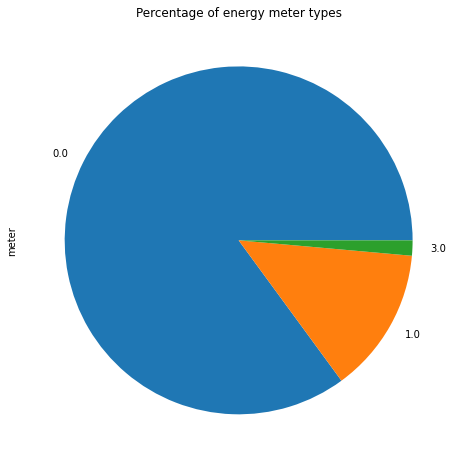

In [106]:
print(data['meter'].value_counts()/len(data['meter']))
ax=(data['meter'].value_counts()/len(data['meter'])).plot(kind='pie', figsize=(8,8))
ax.set_title('Percentage of energy meter types')

###### The electricity energy type accounted for about 85% of the total energy of the meter types, the hot water meter type is rarely used and accounted for less than 1% of the meter types

In [107]:
data['primary_use'].value_counts()/len(data['primary_use'])

Office                           0.848361
Lodging/residential              0.137523
Entertainment/public assembly    0.014117
Name: primary_use, dtype: float64

Office                           0.848361
Lodging/residential              0.137523
Entertainment/public assembly    0.014117
Name: primary_use, dtype: float64


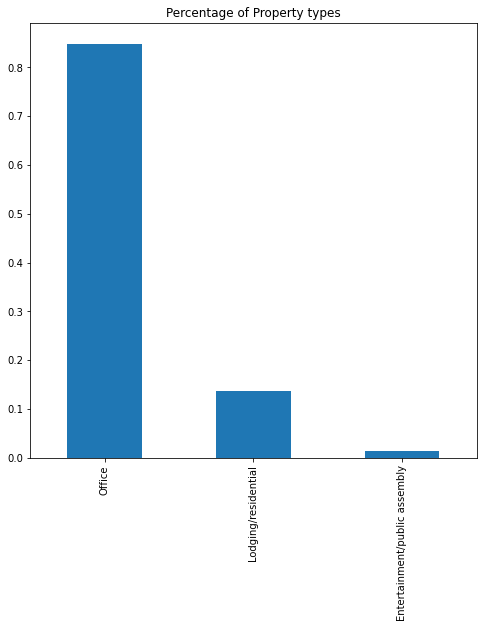

In [108]:
print(data['primary_use'].value_counts()/len(data['primary_use']))
ax=(data['primary_use'].value_counts()/len(data['primary_use'])).plot(kind='bar', figsize=(8,8))
ax.set_title('Percentage of Property types');

##### the office property types accounted for more than four times the number of the other types combined 

In [109]:
data.head(1)

,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,square_feet
0,0.0,2016-01-01 00:00:00,2.325,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,Office,92271


meter
0.0     3.874853
1.0     4.550782
3.0    37.569965
Name: meter_reading, dtype: float64


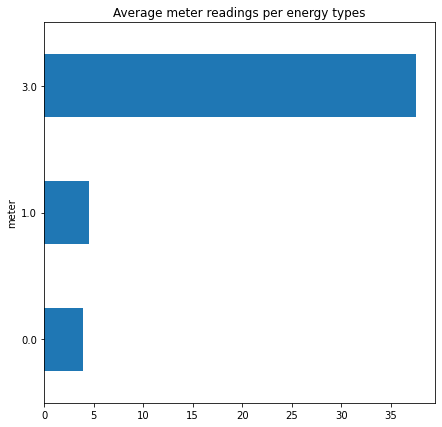

In [110]:
print(data.groupby('meter')['meter_reading'].mean())
ax=data.groupby('meter')['meter_reading'].mean().plot(kind='barh', figsize=(7,7))
ax.set_title('Average meter readings per energy types');

###### Energy type 0 has average meter readings of 3.8 KWh which is the lowest, which shows the electricity meter type has the least energy consumption and it is the preferred type for the buildings, the energy type 3 which is the hotwater meter type has average meter reading of 37.7 KWh, which is why it is the least energy type used

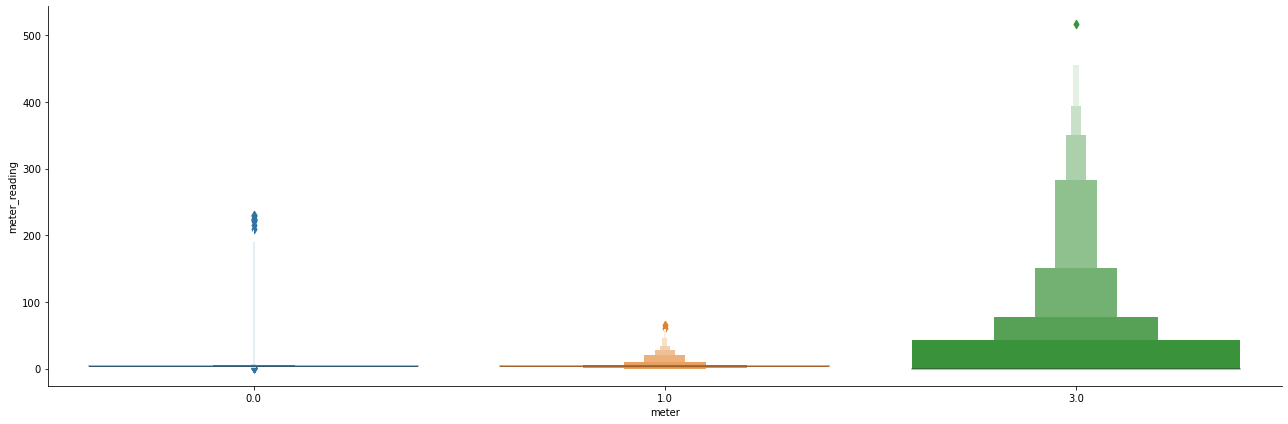

In [111]:
sns.catplot(y='meter_reading', x='meter', data=data.sort_values('meter_reading', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

##### Meter readings 0 and 1 have similar medians, but it can be clearly seen that meter energy type 0 has the smallest meter reading, whiles the meter reading 3 has the most,

In [112]:
data.head(1)

,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,square_feet
0,0.0,2016-01-01 00:00:00,2.325,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,Office,92271


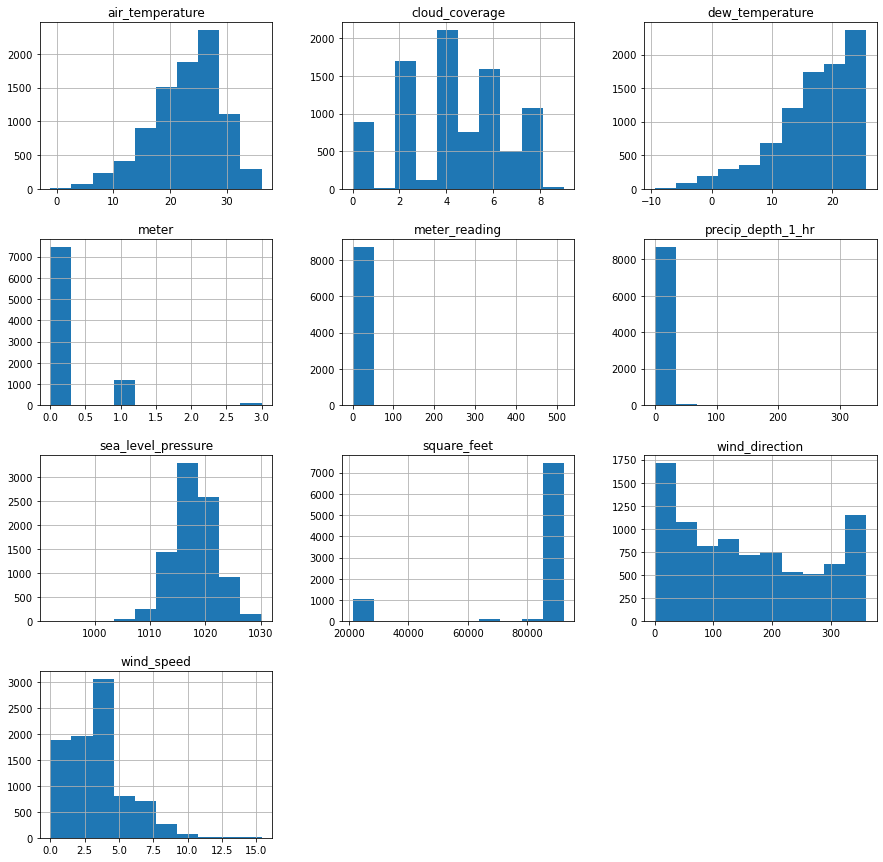

In [113]:
data.hist(figsize=(15,15));

##### the air temperature is left skewed with the most temperature recorded around 14 degree celsius
##### the dew temperature is left skewed which shows the temperature of dew averagely is low
##### the sea level pressure is a bit of a normal distribution
##### the wind speed is a bit right skewed with the most times speed recorded over 24 hours period was around 3.56 m/s
##### the rest of the numerical columns shape take on weird shapes..lol..

In [114]:
#convert to the right format
data['timestamp']=pd.to_datetime(data['timestamp'])

In [115]:
data['timestamp'].max()

Timestamp('2016-12-31 23:00:00')

In [116]:
data['hour']=data.timestamp.dt.hour

In [117]:
data.head()

,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,square_feet,hour
0,0.0,2016-01-01 00:00:00,2.325,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,Office,92271,0
9,0.0,2016-01-01 01:00:00,2.225,24.4,4.0,21.1,-1.0,1020.2,70.0,1.5,Office,92271,1
25,0.0,2016-01-01 02:00:00,2.275,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,Office,92271,2
41,0.0,2016-01-01 03:00:00,2.575,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,Office,92271,3
57,0.0,2016-01-01 04:00:00,3.075,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,Office,92271,4


In [118]:
data['hour'].value_counts()

23    366
15    366
8     366
16    366
1     366
9     366
17    366
2     366
10    366
18    366
3     366
11    366
19    366
4     366
12    366
20    366
5     366
13    366
21    366
6     366
14    366
22    366
7     366
0     366
Name: hour, dtype: int64

Text(0.5, 1.0, 'Average meter reading per Hour of day')

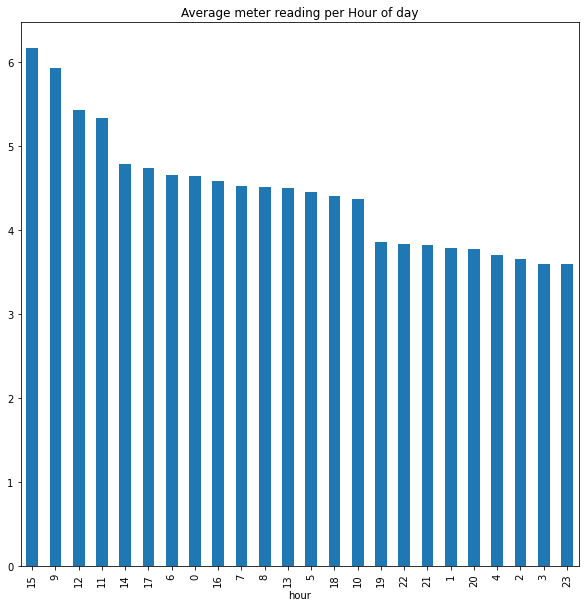

In [119]:
ax=(data.groupby('hour')['meter_reading'].mean()).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))
ax.set_title('Average meter reading per Hour of day')

#### 15:00(3pm) is the time of the day that recorded the highest average meter reading of over 6KWh, whiles 23:00(11pm) recorded the lowest average meter reading of around 3.7KWh, which makes sense since most equipment and devices that draw power are shut down by that time

In [120]:
data.describe()

,meter,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,square_feet,hour
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,0.177596,4.441929,22.828119,4.276745,16.811487,1.382400,1017.979964,156.798725,3.375433,83083.466416,11.500000
std,0.480397,14.281944,6.051542,2.329354,6.527434,12.956203,4.041790,117.621912,2.154075,23269.408806,6.922581
min,0.000000,0.000000,-1.100000,0.000000,-9.400000,-1.000000,992.000000,0.000000,0.000000,21168.000000,0.000000
25%,0.000000,2.675000,18.900000,2.000000,13.300000,0.000000,1015.500000,60.000000,2.100000,92271.000000,5.750000
50%,0.000000,3.275000,23.900000,4.000000,18.300000,0.000000,1018.000000,140.000000,3.100000,92271.000000,11.500000
75%,0.000000,4.050000,26.700000,6.000000,22.200000,0.000000,1020.500000,260.000000,4.600000,92271.000000,17.250000
max,3.000000,517.652000,36.100000,9.000000,25.600000,343.000000,1030.200000,360.000000,15.400000,92271.000000,23.000000


In [121]:
#binning the hours of the day into categories
data['time_of_day']=pd.cut(data['hour'], [0,6,12,18,23], labels=['Night','Morning','Afternoon','Evening'])

In [122]:
data['time_of_day']=data['time_of_day'].fillna('Night')

In [123]:
data.head()

,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,square_feet,hour,time_of_day
0,0.0,2016-01-01 00:00:00,2.325,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,Office,92271,0,Night
9,0.0,2016-01-01 01:00:00,2.225,24.4,4.0,21.1,-1.0,1020.2,70.0,1.5,Office,92271,1,Night
25,0.0,2016-01-01 02:00:00,2.275,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,Office,92271,2,Night
41,0.0,2016-01-01 03:00:00,2.575,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,Office,92271,3,Night
57,0.0,2016-01-01 04:00:00,3.075,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,Office,92271,4,Night


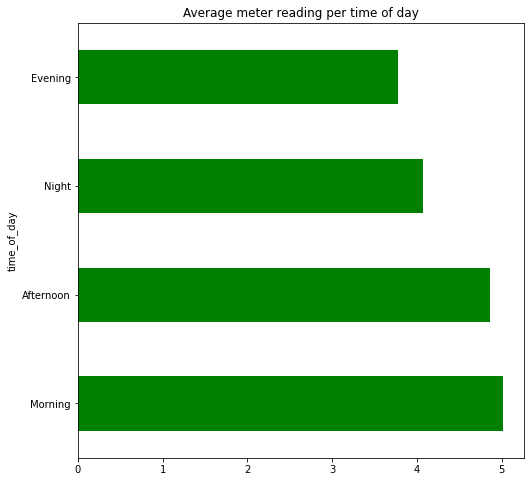

In [124]:
ax=data.groupby('time_of_day')['meter_reading'].mean().sort_values(ascending=False).plot(kind='barh',  color='green',figsize=(8,8))
ax.set_title('Average meter reading per time of day');

#### the highest average meter readings are recorded in the mornings and afternoons of around 5KWh, mostly that is the time equipment and devices are being used. The night and evenings recorded the lowest meter readings of around 4KWh. This can give a sense that the type of buildings captured in this analysis are of the industrial type

In [125]:
data.groupby('time_of_day')['air_temperature','wind_speed','dew_temperature'].mean().sort_values(by='air_temperature',ascending=False)

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,air_temperature,wind_speed,dew_temperature
time_of_day,,,
Evening,26.490765,4.592623,16.055027
Afternoon,24.800956,3.856740,16.922495
Night,21.489539,3.013505,17.104801
Morning,19.364754,2.302049,16.988661


#### the air temperature is highest during the evening and lowest in the morning
#### the speed of the wind is fastest in the evenings and lower in the morning
#### the temperature of the dew is highest at night and lowest in the evening

In [126]:
data.head()

,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,square_feet,hour,time_of_day
0,0.0,2016-01-01 00:00:00,2.325,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,Office,92271,0,Night
9,0.0,2016-01-01 01:00:00,2.225,24.4,4.0,21.1,-1.0,1020.2,70.0,1.5,Office,92271,1,Night
25,0.0,2016-01-01 02:00:00,2.275,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,Office,92271,2,Night
41,0.0,2016-01-01 03:00:00,2.575,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,Office,92271,3,Night
57,0.0,2016-01-01 04:00:00,3.075,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,Office,92271,4,Night


In [127]:
data['month']=data.timestamp.dt.month

In [128]:
data.head()

,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,square_feet,hour,time_of_day,month
0,0.0,2016-01-01 00:00:00,2.325,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,Office,92271,0,Night,1
9,0.0,2016-01-01 01:00:00,2.225,24.4,4.0,21.1,-1.0,1020.2,70.0,1.5,Office,92271,1,Night,1
25,0.0,2016-01-01 02:00:00,2.275,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,Office,92271,2,Night,1
41,0.0,2016-01-01 03:00:00,2.575,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,Office,92271,3,Night,1
57,0.0,2016-01-01 04:00:00,3.075,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,Office,92271,4,Night,1


In [129]:
data['month'].value_counts()

7     744
5     744
12    744
3     744
10    744
1     744
8     744
6     720
4     720
11    720
9     720
2     696
Name: month, dtype: int64

In [130]:
data['time_of_day']=pd.cut(data['month'], [0,6,12,18,23], labels=['Night','Morning','Afternoon','Evening'])

In [131]:
data['month'].value_counts()

7     744
5     744
12    744
3     744
10    744
1     744
8     744
6     720
4     720
11    720
9     720
2     696
Name: month, dtype: int64

In [132]:
data['month']=data['month'].replace({1:13,2:14})

In [146]:
data['seasons']=pd.cut(data['month'], [3,5,8,11,14], labels=['spring','summer','autumn','Winter'], right=False,include_lowest=True)

In [149]:
data['seasons'].value_counts()/len(data['seasons'])

autumn    0.251366
summer    0.251366
Winter    0.166667
spring    0.166667
Name: seasons, dtype: float64

In [1]:
ax=data.groupby('seasons')['meter_reading'].mean().sort_values(ascending=False).plot(kind='barh',  color='red',figsize=(8,8))
ax.set_title('Average meter reading per season');

NameError: name 'data' is not defined

In [136]:
data['month']=data['month'].replace({13:1,14:2})

In [137]:
data['month'].value_counts()

7     744
5     744
12    744
3     744
10    744
1     744
8     744
6     720
4     720
11    720
9     720
2     696
Name: month, dtype: int64

In [138]:
data['month'].value_counts()

7     744
5     744
12    744
3     744
10    744
1     744
8     744
6     720
4     720
11    720
9     720
2     696
Name: month, dtype: int64

Text(0.5, 1.0, 'Average meter readings per month')

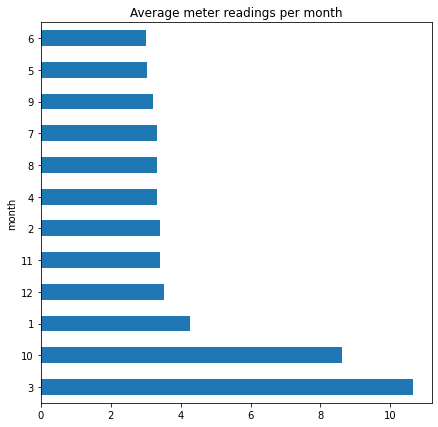

In [139]:
ax=(data.groupby('month')['meter_reading'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(7,7)))
ax.set_title('Average meter readings per month')

#### March recorded the highest average meter reading by far of over 10KWh whiles june and may recorded the least. 
#### It can be seen that the summer months recorded the least meter readings. This cold be due to less use of heating devices and equipment due to the hot weather
#### Therefore, the summer months seem to be the most ideal time to measure energy efficient performances

In [140]:
data.head(1)

,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,square_feet,hour,time_of_day,month,seasons
0,0.0,2016-01-01,2.325,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,Office,92271,0,Night,1,Winter


Text(0.5, 1.0, 'Average meter readings per building primary use')

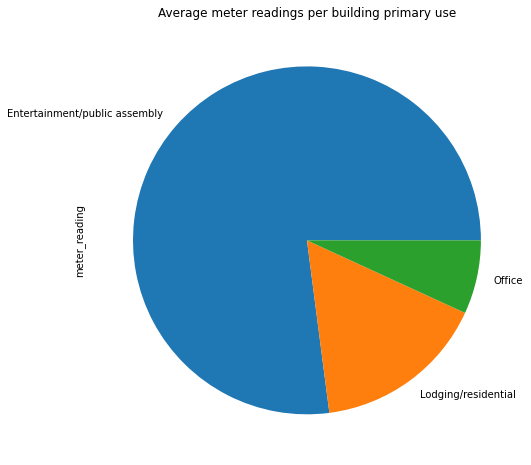

In [141]:
ax=data.groupby('primary_use')['meter_reading'].mean().plot(kind='pie', figsize=(8,8))
ax.set_title('Average meter readings per building primary use')

#### It can be seen that the buildings for entertainment or public assembly record far higher meter readings averagely due to lots of equipment and devices needed for such places. The office recorded the least

In [142]:
#remove unneccesary columns
data=data.drop(columns=['timestamp','square_feet'])

In [143]:
data.head()

,meter,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,hour,time_of_day,month,seasons
0,0.0,2.325,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,Office,0,Night,1,Winter
9,0.0,2.225,24.4,4.0,21.1,-1.0,1020.2,70.0,1.5,Office,1,Night,1,Winter
25,0.0,2.275,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,Office,2,Night,1,Winter
41,0.0,2.575,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,Office,3,Night,1,Winter
57,0.0,3.075,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,Office,4,Night,1,Winter


In [144]:
data.corr()

,meter,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,month
meter,1.000000,0.206653,-0.177178,0.026615,-0.197068,0.032094,0.110414,0.067691,0.036972,-8.216752e-04,-3.244803e-01
meter_reading,0.206653,1.000000,0.015170,0.034610,0.038791,-0.002063,-0.031567,-0.024077,0.020463,-1.657806e-03,-1.920826e-02
air_temperature,-0.177178,0.015170,1.000000,0.169206,0.728525,0.000941,-0.318407,-0.213780,0.083762,3.389645e-01,2.866563e-01
cloud_coverage,0.026615,0.034610,0.169206,1.000000,0.250355,0.121193,-0.243803,-0.024017,0.145641,1.107964e-01,-9.904292e-02
dew_temperature,-0.197068,0.038791,0.728525,0.250355,1.000000,0.067501,-0.376032,-0.271175,-0.169151,-5.030215e-02,3.482850e-01
precip_depth_1_hr,0.032094,-0.002063,0.000941,0.121193,0.067501,1.000000,-0.082836,0.010576,0.044009,3.112470e-02,-1.068454e-02
sea_level_pressure,0.110414,-0.031567,-0.318407,-0.243803,-0.376032,-0.082836,1.000000,-0.103177,-0.146469,-6.080094e-02,3.696917e-02
wind_direction,0.067691,-0.024077,-0.213780,-0.024017,-0.271175,0.010576,-0.103177,1.000000,0.226082,4.370205e-02,-8.837154e-02
wind_speed,0.036972,0.020463,0.083762,0.145641,-0.169151,0.044009,-0.146469,0.226082,1.000000,2.820501e-01,-6.032382e-02
hour,-0.000822,-0.001658,0.338965,0.110796,-0.050302,0.031125,-0.060801,0.043702,0.282050,1.000000e+00,-1.523676e-19


#### The meter types has the highest correlation with the meter reading column, the rest have very little correlation




In [145]:
#data.to_csv('data_model.csv')